https://scholarworks.montana.edu/xmlui/handle/1/3507

# Read.Me

What is this?
-------------

This folder contains A/B testing data that corresponds with 
the following Open Access academic research paper:

Young, Scott W.H. (2014) Improving Library User Experience with A/B Testing: Principles and Process. Weave: Journal of Library User Experience. University of Michigan Library. http://dx.doi.org/10.3998/weave.12535642.0001.101


Who created it?
-------------

This data was prepared by Scott W. H. Young, 
Digital Initiatives Librarian at Montana State University.


How was it created?
--------------

The folder contains data exported from Google Analytics and Crazy Egg.


How do I use it?
----------------

The subfolder named "GoogleAnalytics" contains 4 files:
	- Data from Google Analytics Users Flow, in PDF
	- Data from Google Analytics All Pages view, in PDF and XSL
	- Data from Google Analytics Experiments

The subfolder named "CrazyEgg" contains 5 subfolders, 
one each that corresponds with an A/B test variation 
used during the experiment described in the above paper.
Each subfolder contains 3 files:
	- Data visualization of user click behavior, in PDF and JPEG
	- Data for user click behavior, in XSL

Together these files may be used to reconstruct results and
to guide the design of additional A/B tests.


Licensing
----------

This data is licensed CC BY-SA, http://creativecommons.org/licenses/by-sa/4.0/


Contact
--------

For feedback and inquiry, 
	- write swyoung@montana.edu
	- tweet @hei_scott
	- visit http://hellolibrarian.com

# Data analysis

### Objective
To perform a brief analysis of the 5 datasets to prepare for `Multivarate-testing`

### Steps
- Load in all the library tools and dataset
- Overview of the analysis using table visualization and structural descriptive method
- Summary of the finding

In [1]:
install.packages('effsize')


The downloaded binary packages are in
	/var/folders/38/znzm6_2d3w91f8cfqsrdl3480000gp/T//Rtmpp9koaW/downloaded_packages


In [2]:
# load all the necessary library
library(dplyr)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(scales)
library(reshape2)
library(lsr)
library(pwr)
library(effsize)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
# Installing 5 different versions of page
version_1 <- read.csv('CrazyEgg/Homepage Version 1 - Interact, 5-29-2013/Element list Homepage Version 1 - Interact, 5-29-2013.csv')
version_2 <- read.csv('CrazyEgg/Homepage Version 2 - Connect, 5-29-2013/Element list Homepage Version 2 - Connect, 5-29-2013.csv')
version_3 <- read.csv('CrazyEgg/Homepage Version 3 - Learn, 5-29-2013/Element list Homepage Version 3 - Learn, 5-29-2013.csv')
version_4 <- read.csv('CrazyEgg/Homepage Version 4 - Help, 5-29-2013/Element list Homepage Version 4 - Help, 5-29-2013.csv')
version_5 <- read.csv('CrazyEgg/Homepage Version 5 - Services, 5-29-2013/Element list Homepage Version 5 - Services, 5-29-2013.csv')

#### Systematically visualize the 5 different versions of dataset

In [4]:
version_1

Element.ID,Tag.name,Name,No..clicks,Visible.,Snapshot.information
<int>,<chr>,<chr>,<int>,<chr>,<chr>
128,area,Montana State University - Home,1291,false,Homepage Version 1 - Interact • http://www.lib.montana.edu/index.php
69,a,FIND,842,true,"created 5-29-2013 • 20 days 4 hours 21 mins • 10283 visits, 3714 clicks"
61,input,s.q,508,true,
67,a,lib.montana.edu/find/,166,true,
78,a,REQUEST,151,true,
98,a,Hours,102,true,
62,button,Search,101,true,
118,a,MSU,55,true,
50,span,nav-item-dot,46,true,


In [5]:
head(version_2,2)

,Element.ID,Tag.name,Name,No..clicks,Visible.,Snapshot.information
,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,74,a,FIND,502,true,Homepage Version 2 - Connect • http://www.lib.montana.edu/index2.php
2,66,input,s.q,357,true,"created 5-29-2013 • 20 days 7 hours 34 mins • 2742 visits, 1587 clicks"


In [6]:
head(version_3,2)

,Element.ID,Tag.name,Name,No..clicks,Visible.,Snapshot.information
,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,69,a,FIND,587,true,Homepage Version 3 - Learn • http://www.lib.montana.edu/index3.php
2,61,input,s.q,325,true,"created 5-29-2013 • 20 days 12 hours 21 mins • 2747 visits, 1652 clicks"


In [7]:
head(version_4,2)

,Element.ID,Tag.name,Name,No..clicks,Visible.,Snapshot.information
,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,74,a,FIND,631,true,Homepage Version 4 - Help • http://www.lib.montana.edu/index4.php
2,66,input,s.q,364,true,"created 5-29-2013 • 20 days 4 hours 59 mins • 3180 visits, 1717 clicks"


In [8]:
head(version_5,2)

,Element.ID,Tag.name,Name,No..clicks,Visible.,Snapshot.information
,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,69,a,FIND,397,true,Homepage Version 5 - Services • http://www.lib.montana.edu/index5.php
2,61,input,s.q,323,true,"created 5-29-2013 • 20 days 4 hours 59 mins • 2064 visits, 1348 clicks"


#### Using str perform quick descriptive analysis

In [9]:
print(str(version_1))
print(str(version_2))
print(str(version_3))
print(str(version_4))
print(str(version_5))

'data.frame':	69 obs. of  6 variables:
 $ Element.ID          : int  128 69 61 67 78 98 62 118 50 87 ...
 $ Tag.name            : chr  "area" "a" "input" "a" ...
 $ Name                : chr  "Montana State University - Home" "FIND" "s.q" "lib.montana.edu/find/" ...
 $ No..clicks          : int  1291 842 508 166 151 102 101 55 46 42 ...
 $ Visible.            : chr  "false" "true" "true" "true" ...
 $ Snapshot.information: chr  "Homepage Version 1 - Interact   •   http://www.lib.montana.edu/index.php" "created 5-29-2013   •   20 days 4 hours 21 mins   •   10283 visits, 3714 clicks" "" "" ...
NULL
'data.frame':	58 obs. of  6 variables:
 $ Element.ID          : int  74 66 72 133 103 83 92 67 81 101 ...
 $ Tag.name            : chr  "a" "input" "a" "area" ...
 $ Name                : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University Libraries - Home" ...
 $ No..clicks          : int  502 357 171 83 74 57 53 47 31 31 ...
 $ Visible.            : chr  "true" "true" "true" 

In [10]:
colnames(version_1)

[1] "Element.ID"           "Tag.name"             "Name"                
[4] "No..clicks"           "Visible."             "Snapshot.information"

## Data Analysis
version_1- 69 rows and 6 columns
version_2 58 rows and 6 columns
version_3 62 rows and 6 columns
version_4 57 rows and 6 columns
version_5 53 rows and 6 columns

All dataset contain same column name: `'Element.ID''Tag.name''Name''No..clicks''Visible.''Snapshot.information'`
#### Data cleaning
- extra columns 
- column name non-coherent
- missing data in all data sets

In [11]:
# function to perform full outer join on version_1
multimerge <- function (mylist) {
  ## mimics a recursive merge or full outer join
 
    # unlist and put all unique elements inside a variable
  unames <- unique(unlist(lapply(mylist, rownames)))
 
    # store size of unlist names in a variables
  n <- length(unames)
 
    # recursive function
  out <- lapply(mylist, function(df) {
 
    tmp <- matrix(nr = n, nc = ncol(df), dimnames = list(unames,colnames(df)))
    tmp[rownames(df), ] <- as.matrix(df)
    rm(df); gc()
 
    return(tmp)
  })
 
  stopifnot( all( sapply(out, function(x) identical(rownames(x), unames)) ) )
 
  bigout <- do.call(cbind, out)
  colnames(bigout) <- paste(rep(names(mylist), sapply(mylist, ncol)), unlist(sapply(mylist, colnames)), sep = "_")
  return(bigout)
}

# store all merged datasets into a variable
df <- multimerge( list (one=version_1, two=version_2, three=version_3, four=version_4, five=version_5))
# fill all n/a variable with 0
df[is.na(df)] <- 0
# Change the dataset back to dataframe structure
df <- data.frame(df)
str(df)

'data.frame':	69 obs. of  30 variables:
 $ one_Element.ID            : chr  "128" " 69" " 61" " 67" ...
 $ one_Tag.name              : chr  "area" "a" "input" "a" ...
 $ one_Name                  : chr  "Montana State University - Home" "FIND" "s.q" "lib.montana.edu/find/" ...
 $ one_No..clicks            : chr  "1291" " 842" " 508" " 166" ...
 $ one_Visible.              : chr  "false" "true" "true" "true" ...
 $ one_Snapshot.information  : chr  "Homepage Version 1 - Interact   •   http://www.lib.montana.edu/index.php" "created 5-29-2013   •   20 days 4 hours 21 mins   •   10283 visits, 3714 clicks" "" "" ...
 $ two_Element.ID            : chr  " 74" " 66" " 72" "133" ...
 $ two_Tag.name              : chr  "a" "input" "a" "area" ...
 $ two_Name                  : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University Libraries - Home" ...
 $ two_No..clicks            : chr  "502" "357" "171" " 83" ...
 $ two_Visible.              : chr  "true" "true" "true" "false" ...
 

In [12]:
# Checking columns names
colnames(df)

[1] "one_Element.ID"             "one_Tag.name"              
 [3] "one_Name"                   "one_No..clicks"            
 [5] "one_Visible."               "one_Snapshot.information"  
 [7] "two_Element.ID"             "two_Tag.name"              
 [9] "two_Name"                   "two_No..clicks"            
[11] "two_Visible."               "two_Snapshot.information"  
[13] "three_Element.ID"           "three_Tag.name"            
[15] "three_Name"                 "three_No..clicks"          
[17] "three_Visible."             "three_Snapshot.information"
[19] "four_Element.ID"            "four_Tag.name"             
[21] "four_Name"                  "four_No..clicks"           
[23] "four_Visible."              "four_Snapshot.information" 
[25] "five_Element.ID"            "five_Tag.name"             
[27] "five_Name"                  "five_No..clicks"           
[29] "five_Visible."              "five_Snapshot.information"

In [13]:
# changed column names
df <- df %>% 
{colnames(.)[4] = "control";.} %>% 
{colnames(.)[10] = "no_clicks_version_2";.} %>%
{colnames(.)[16] = "no_clicks_version_3";.} %>%
{colnames(.)[22] = "no_clicks_version_4";.} %>%
{colnames(.)[28] = "no_clicks_version_5";.} 
colnames(df)

[1] "one_Element.ID"             "one_Tag.name"              
 [3] "one_Name"                   "control"                   
 [5] "one_Visible."               "one_Snapshot.information"  
 [7] "two_Element.ID"             "two_Tag.name"              
 [9] "two_Name"                   "no_clicks_version_2"       
[11] "two_Visible."               "two_Snapshot.information"  
[13] "three_Element.ID"           "three_Tag.name"            
[15] "three_Name"                 "no_clicks_version_3"       
[17] "three_Visible."             "three_Snapshot.information"
[19] "four_Element.ID"            "four_Tag.name"             
[21] "four_Name"                  "no_clicks_version_4"       
[23] "four_Visible."              "four_Snapshot.information" 
[25] "five_Element.ID"            "five_Tag.name"             
[27] "five_Name"                  "no_clicks_version_5"       
[29] "five_Visible."              "five_Snapshot.information"

In [14]:
# Using select to index out the working columns
df <- df %>%
select(one_Name,control,two_Name,no_clicks_version_2,three_Name,no_clicks_version_3,
       four_Name,no_clicks_version_4,five_Name,no_clicks_version_5)
df

,one_Name,control,two_Name,no_clicks_version_2,three_Name,no_clicks_version_3,four_Name,no_clicks_version_4,five_Name,no_clicks_version_5
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Montana State University - Home,1291,FIND,502,FIND,587,FIND,631,FIND,397
2,FIND,842,s.q,357,s.q,325,s.q,364,s.q,323
3,s.q,508,lib.montana.edu/find/,171,lib.montana.edu/find/,142,lib.montana.edu/find/,139,lib.montana.edu/find/,106
4,lib.montana.edu/find/,166,Montana State University Libraries - Home,83,Montana State University - Home,83,Montana State University - Home,122,Search,85
5,REQUEST,151,Hours,74,Hours,76,REQUEST,72,Hours,81
6,Hours,102,REQUEST,57,REQUEST,63,Hours,68,REQUEST,57
7,Search,101,CONNECT,53,Search,50,Search,59,Montana State University - Home,49
8,MSU,55,Search,47,News,45,HELP,38,SERVICES,45
9,nav-item-dot,46,lib.montana.edu/request/,31,slideshow-right,35,News,26,News,24


# A/B/C/D_testing

x,y: numeric vectors  

alternative: the alternative hypothesis. Allowed value is one of “two.sided” (default), “greater” or “less”.   

var.equal: a logical variable indicating whether to treat the two variances as being equal. If TRUE then the pooled variance is used to estimate the variance otherwise the Welch test is used.  

In [15]:
str(df)

'data.frame':	69 obs. of  10 variables:
 $ one_Name           : chr  "Montana State University - Home" "FIND" "s.q" "lib.montana.edu/find/" ...
 $ control            : chr  "1291" " 842" " 508" " 166" ...
 $ two_Name           : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University Libraries - Home" ...
 $ no_clicks_version_2: chr  "502" "357" "171" " 83" ...
 $ three_Name         : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University - Home" ...
 $ no_clicks_version_3: chr  "587" "325" "142" " 83" ...
 $ four_Name          : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University - Home" ...
 $ no_clicks_version_4: chr  "631" "364" "139" "122" ...
 $ five_Name          : chr  "FIND" "s.q" "lib.montana.edu/find/" "Search" ...
 $ no_clicks_version_5: chr  "397" "323" "106" " 85" ...


In [16]:
df$control <- as.numeric(df$control)
df$no_clicks_version_2 <- as.numeric(df$no_clicks_version_2)
df$no_clicks_version_3 <- as.numeric(df$no_clicks_version_3)
df$no_clicks_version_4 <- as.numeric(df$no_clicks_version_4)
df$no_clicks_version_5 <- as.numeric(df$no_clicks_version_5)

In [17]:
str(df)

'data.frame':	69 obs. of  10 variables:
 $ one_Name           : chr  "Montana State University - Home" "FIND" "s.q" "lib.montana.edu/find/" ...
 $ control            : num  1291 842 508 166 151 ...
 $ two_Name           : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University Libraries - Home" ...
 $ no_clicks_version_2: num  502 357 171 83 74 57 53 47 31 31 ...
 $ three_Name         : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University - Home" ...
 $ no_clicks_version_3: num  587 325 142 83 76 63 50 45 35 26 ...
 $ four_Name          : chr  "FIND" "s.q" "lib.montana.edu/find/" "Montana State University - Home" ...
 $ no_clicks_version_4: num  631 364 139 122 72 68 59 38 26 17 ...
 $ five_Name          : chr  "FIND" "s.q" "lib.montana.edu/find/" "Search" ...
 $ no_clicks_version_5: num  397 323 106 85 81 57 49 45 24 22 ...


## Test 1

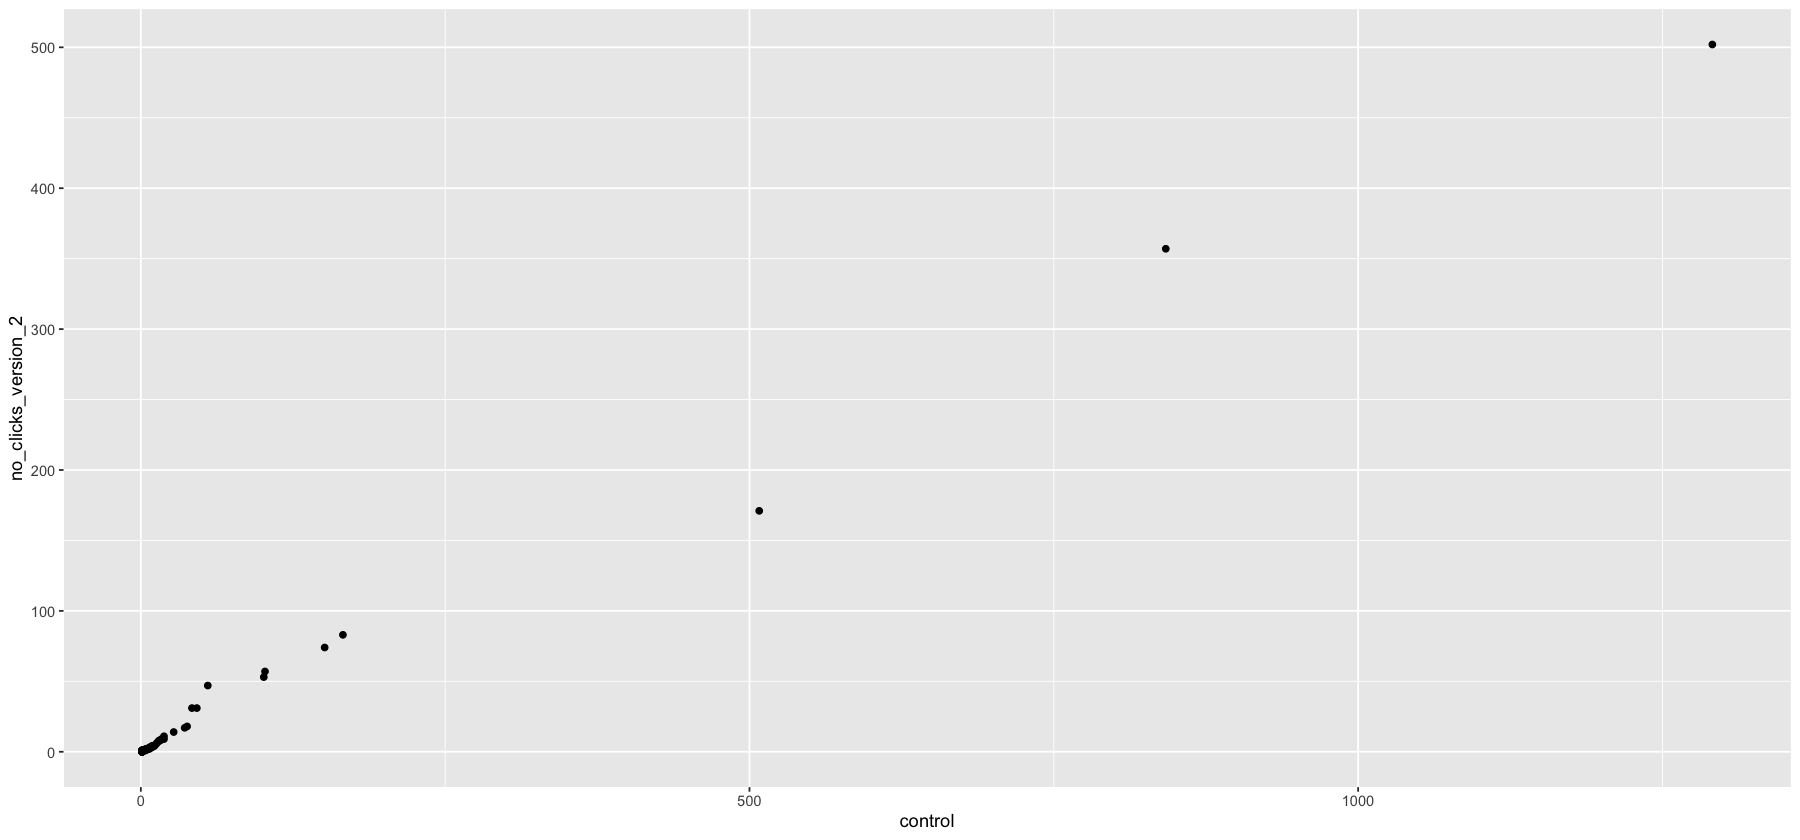

In [43]:
ggplot(df, aes(control,no_clicks_version_2))+
geom_point()

In [18]:
# T test control and version 2
t.test(df$control,df$no_clicks_version_2)


	Welch Two Sample t-test

data:  df$control and df$no_clicks_version_2
t = 1.2368, df = 88.883, p-value = 0.2194
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.69681  80.34899
sample estimates:
mean of x mean of y 
 53.82609  23.00000 


In [19]:
cohen.d(df$control, df$no_clicks_version_2, pooled=TRUE, paired=FALSE, na.rm=FALSE, 
    hedges.correction = FALSE, conf.level = 0.95, noncentral = FALSE)


Cohen's d

d estimate: 0.2105736 (small)
95 percent confidence interval:
     lower      upper 
-0.1270405  0.5481877 


In [20]:
pwr.t.test(n = 69, 
           d = 0.21,
           sig.level = 0.05,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)


     Two-sample t test power calculation 

              n = 69
              d = 0.21
      sig.level = 0.05
          power = 0.2318351
    alternative = two.sided

NOTE: n is number in *each* group


### Result Test 1
The obtained result from test one between control and version_1 `fail` to reject the null hypothesis. p.value: (`0.2195`) which is larger than or alpha level: `0.05`. In term of the effect size, according to cohen's d table, the effect size relatively small. The power for from this t test is also `0.23` which is also relatively small.

## Test 2

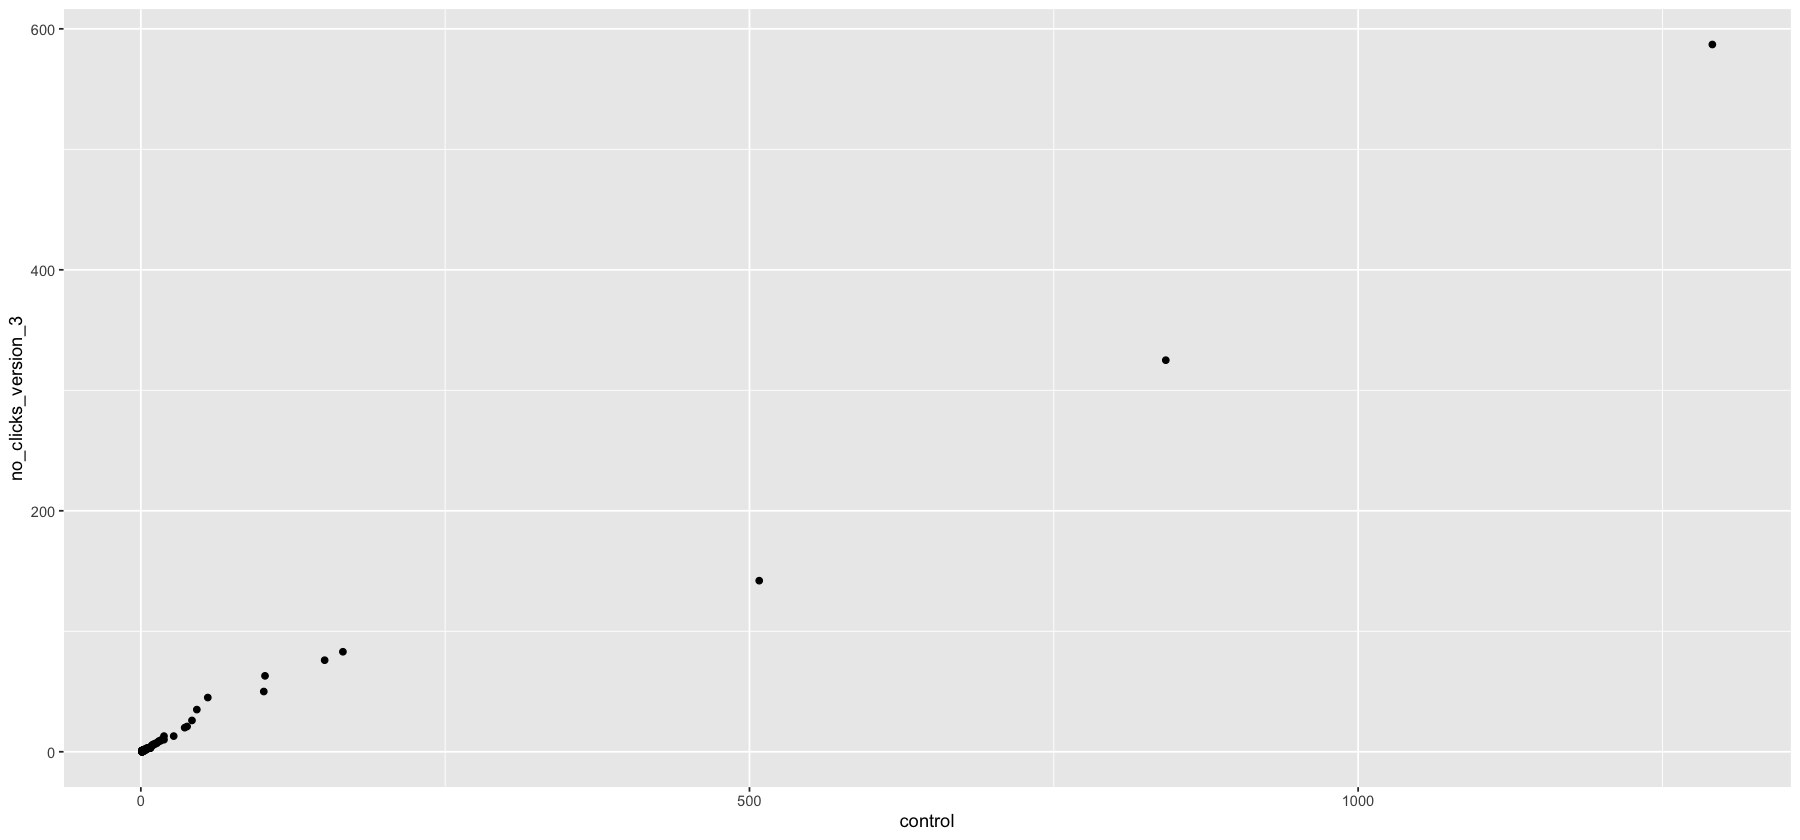

In [40]:
ggplot(df, aes(control,no_clicks_version_3))+
geom_point()

In [21]:
# T test control and version 3
t.test(df$control,df$no_cblicks_version_3)


	One Sample t-test

data:  df$control
t = 2.3234, df = 68, p-value = 0.02316
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
   7.596754 100.055420
sample estimates:
mean of x 
 53.82609 


In [22]:
cohen.d(df$control, df$no_clicks_version_3, pooled=TRUE, paired=FALSE, na.rm=FALSE, 
    hedges.correction = FALSE, conf.level = 0.95, noncentral = FALSE)


Cohen's d

d estimate: 0.2020817 (small)
95 percent confidence interval:
     lower      upper 
-0.1354589  0.5396222 


In [23]:
pwr.t.test(n = 69, 
           d = 0.20,
           sig.level = 0.05,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)


     Two-sample t test power calculation 

              n = 69
              d = 0.2
      sig.level = 0.05
          power = 0.2146236
    alternative = two.sided

NOTE: n is number in *each* group


### Result Test 2
The obtained result from test one between control and version_2. We `fail` to reject the null hypothesis. p.value: (`0.202`) which is larger than or alpha level: `0.05`. In term of the effect size, according to cohen's d table, the effect size relatively small. The power for from this t test is also `0.214` which is also relatively small.

## Test 3

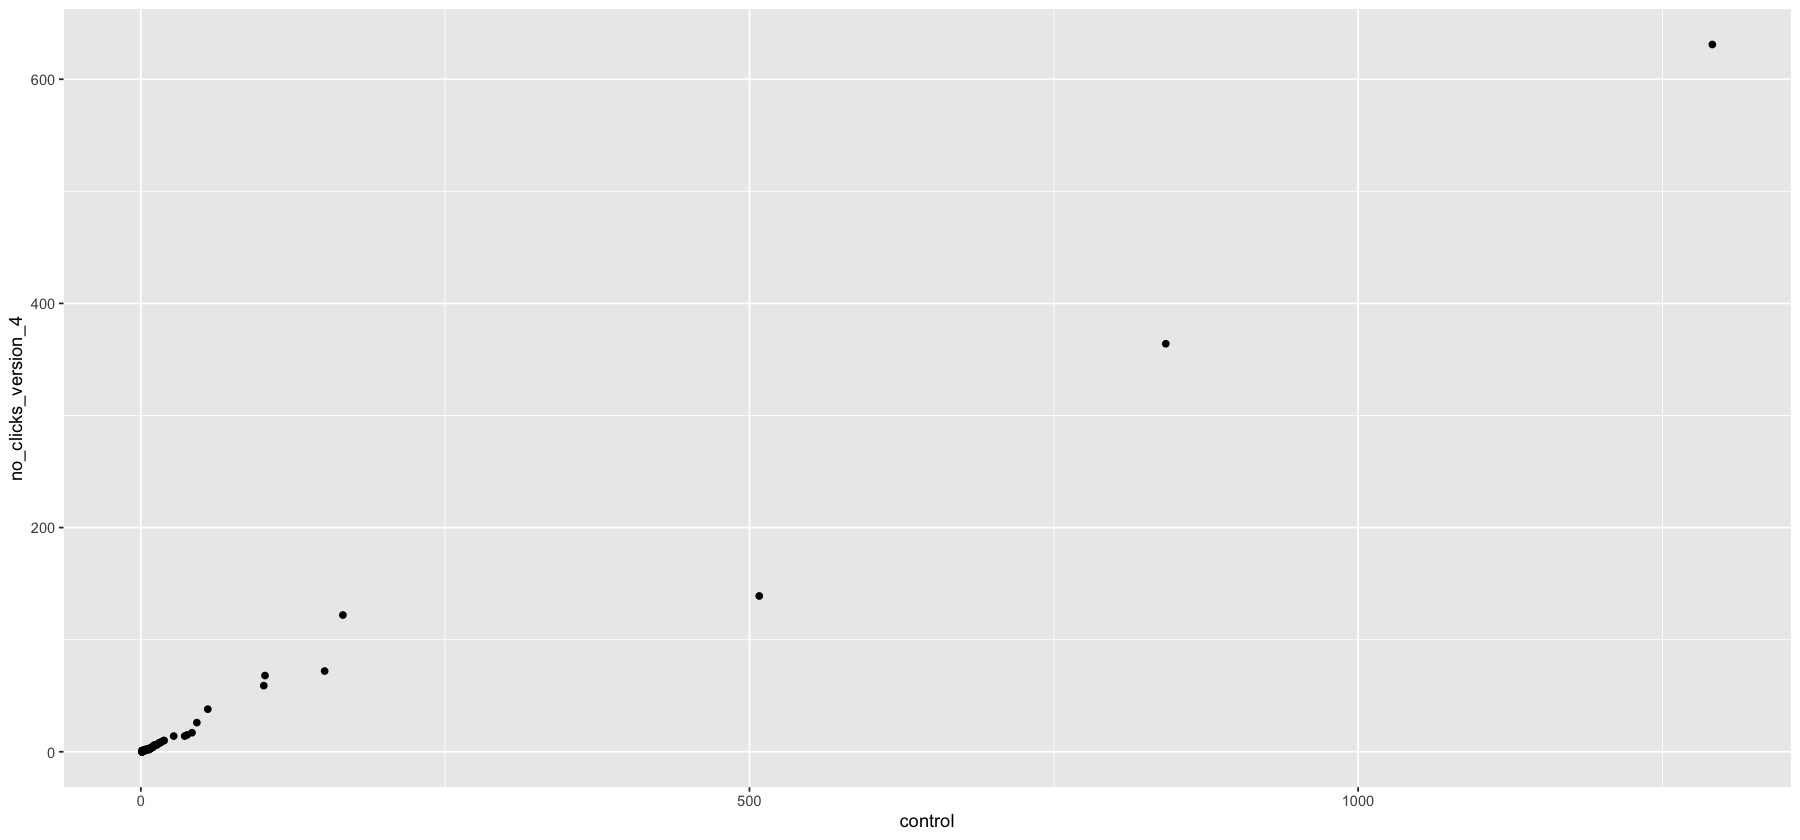

In [41]:
ggplot(df, aes(control,no_clicks_version_4))+
geom_point()

In [24]:
# T test control and version 4
t.test(df$control,df$no_clicks_version_4)


	Welch Two Sample t-test

data:  df$control and df$no_clicks_version_4
t = 1.1338, df = 95.843, p-value = 0.2597
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.73000  79.61406
sample estimates:
mean of x mean of y 
 53.82609  24.88406 


In [25]:
cohen.d(df$control, df$no_clicks_version_4, pooled=TRUE, paired=FALSE, na.rm=FALSE, 
    hedges.correction = FALSE, conf.level = 0.95, noncentral = FALSE)


Cohen's d

d estimate: 0.1930266 (negligible)
95 percent confidence interval:
     lower      upper 
-0.1444388  0.5304921 


In [26]:
pwr.t.test(n = 69, 
           d = 0.19,
           sig.level = 0.05,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)


     Two-sample t test power calculation 

              n = 69
              d = 0.19
      sig.level = 0.05
          power = 0.1982295
    alternative = two.sided

NOTE: n is number in *each* group


## Result Test 3
In test 3, we also fail to reject null hypothesis. Our obtained p-value: 0.2597 which is larger than Alpha level: 0.05. The size effect is small. Power level is small.

## Test 4

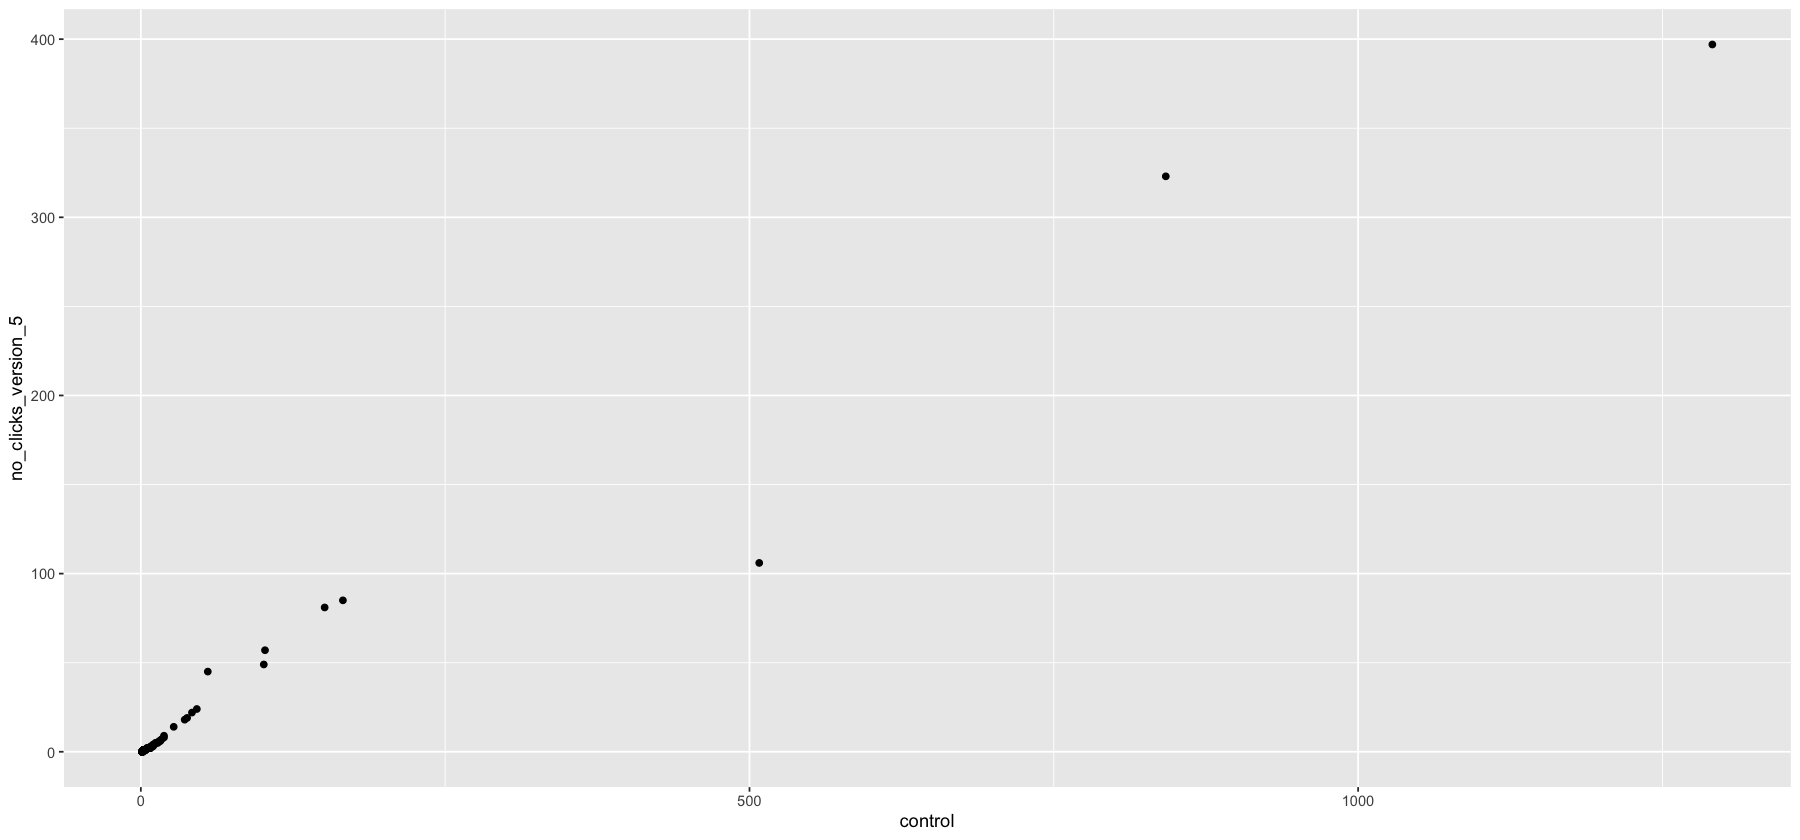

In [42]:
ggplot(df, aes(control,no_clicks_version_5))+
geom_point()

In [27]:
# T test control and version 5
t.test(df$control,df$no_clicks_version_5)


	Welch Two Sample t-test

data:  df$control and df$no_clicks_version_5
t = 1.4064, df = 82.453, p-value = 0.1634
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.20692  82.78663
sample estimates:
mean of x mean of y 
 53.82609  19.53623 


In [28]:
cohen.d(df$control, df$no_clicks_version_5, pooled=TRUE, paired=FALSE, na.rm=FALSE, 
    hedges.correction = FALSE, conf.level = 0.95, noncentral = FALSE)


Cohen's d

d estimate: 0.2394484 (small)
95 percent confidence interval:
      lower       upper 
-0.09843829  0.57733499 


In [29]:
pwr.t.test(n = 69, 
           d = 0.23,
           sig.level = 0.05,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)


     Two-sample t test power calculation 

              n = 69
              d = 0.23
      sig.level = 0.05
          power = 0.2685869
    alternative = two.sided

NOTE: n is number in *each* group


### Result Test 4
In test 3, we also fail to reject null hypothesis. Our obtained p-value: 0.1634, much more better than other versions but still not effective. The size effect is small. Power level is small.

##### Correction Error
significant levels willing to accept /numbers of test = threshold
but either way they all fail.

### Summary of All the Result
According the obtained p values in all 4 different version of two sample t-test. All p values show NO siginificant effect. We FAIL to reject null hypothesis in this experiment.


## Using Anova test instead of t-test
Anova test is better for multiple variable at the same time. In the below section, I will be using Anova test to conduct the same test as above for the sake of experimentation.

In [30]:
head(df,5)

,one_Name,control,two_Name,no_clicks_version_2,three_Name,no_clicks_version_3,four_Name,no_clicks_version_4,five_Name,no_clicks_version_5
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Montana State University - Home,1291,FIND,502,FIND,587,FIND,631,FIND,397
2,FIND,842,s.q,357,s.q,325,s.q,364,s.q,323
3,s.q,508,lib.montana.edu/find/,171,lib.montana.edu/find/,142,lib.montana.edu/find/,139,lib.montana.edu/find/,106
4,lib.montana.edu/find/,166,Montana State University Libraries - Home,83,Montana State University - Home,83,Montana State University - Home,122,Search,85
5,REQUEST,151,Hours,74,Hours,76,REQUEST,72,Hours,81


In [31]:
# Testing using Anova function and store it into fit variabled
fit <-aov(control ~ no_clicks_version_2 + no_clicks_version_3 + no_clicks_version_4
          + no_clicks_version_5, data=df)

In [32]:
# This will give us a quick summary of our test result
summary(fit)

                    Df  Sum Sq Mean Sq   F value   Pr(>F)    
no_clicks_version_2  1 2496884 2496884 27405.648  < 2e-16 ***
no_clicks_version_3  1     652     652     7.158 0.009467 ** 
no_clicks_version_4  1    1310    1310    14.381 0.000333 ***
no_clicks_version_5  1   13599   13599   149.258  < 2e-16 ***
Residuals           64    5831      91                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Result
As we can see from our result, All version in comparison with the control version shown NO significant improvement in clicks. We can assume that the user from this pages have a bias tendency of comfortability of using the same page as before and spent more time clicking. This is kind of confounding variables are part of experimentation that we should consider when conducting research study.

## Data Visualization

In [33]:
# Average clicks score of all version and control variable
avg_plot <- df %>% summarize(control=mean(control),version_2 = mean(no_clicks_version_2),
                             version_3 = mean(no_clicks_version_3),
                             version_4 = mean(no_clicks_version_4),
                             version_5 = mean(no_clicks_version_5))
avg_plot

control,version_2,version_3,version_4,version_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53.82609,23,23.94203,24.88406,19.53623


In [34]:
df

,one_Name,control,two_Name,no_clicks_version_2,three_Name,no_clicks_version_3,four_Name,no_clicks_version_4,five_Name,no_clicks_version_5
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Montana State University - Home,1291,FIND,502,FIND,587,FIND,631,FIND,397
2,FIND,842,s.q,357,s.q,325,s.q,364,s.q,323
3,s.q,508,lib.montana.edu/find/,171,lib.montana.edu/find/,142,lib.montana.edu/find/,139,lib.montana.edu/find/,106
4,lib.montana.edu/find/,166,Montana State University Libraries - Home,83,Montana State University - Home,83,Montana State University - Home,122,Search,85
5,REQUEST,151,Hours,74,Hours,76,REQUEST,72,Hours,81
6,Hours,102,REQUEST,57,REQUEST,63,Hours,68,REQUEST,57
7,Search,101,CONNECT,53,Search,50,Search,59,Montana State University - Home,49
8,MSU,55,Search,47,News,45,HELP,38,SERVICES,45
9,nav-item-dot,46,lib.montana.edu/request/,31,slideshow-right,35,News,26,News,24


Using one_Name, two_Name, three_Name, four_Name, five_Name as id variables



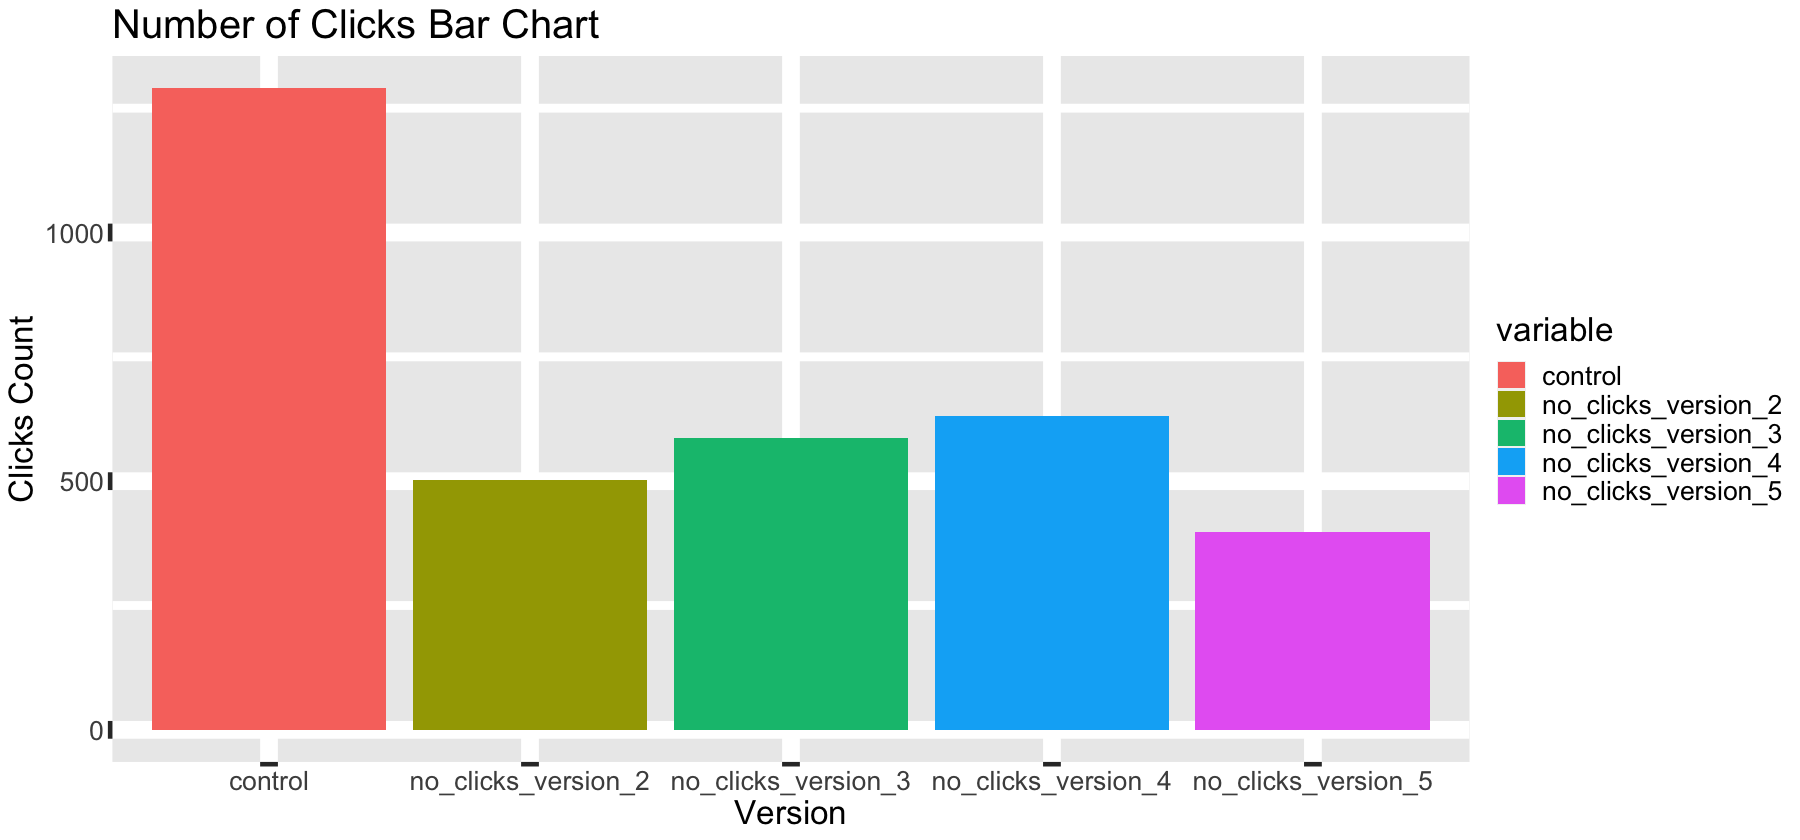

In [35]:
# Use melt to reshape the columns to fit our data
df2 = melt(df)
# Bar graph of our click scores 
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(data=df2, aes(x=variable, y=value, fill=variable)) +
     geom_bar(stat="identity", position=position_dodge())+
      labs(
    y = 'Clicks Count',
    x = "Version",
    title = "Number of Clicks Bar Chart"
  ) +
     theme(text = element_text(size = 20),
element_line(size = 5))


In [36]:
# Top 10 features in each version with most clicks
top_10 <- head(df,10)
top_10 <- melt(top_10)
top_10

Using one_Name, two_Name, three_Name, four_Name, five_Name as id variables



one_Name,two_Name,three_Name,four_Name,five_Name,variable,value
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
Montana State University - Home,FIND,FIND,FIND,FIND,control,1291
FIND,s.q,s.q,s.q,s.q,control,842
s.q,lib.montana.edu/find/,lib.montana.edu/find/,lib.montana.edu/find/,lib.montana.edu/find/,control,508
lib.montana.edu/find/,Montana State University Libraries - Home,Montana State University - Home,Montana State University - Home,Search,control,166
REQUEST,Hours,Hours,REQUEST,Hours,control,151
Hours,REQUEST,REQUEST,Hours,REQUEST,control,102
Search,CONNECT,Search,Search,Montana State University - Home,control,101
MSU,Search,News,HELP,SERVICES,control,55
nav-item-dot,lib.montana.edu/request/,slideshow-right,News,News,control,46


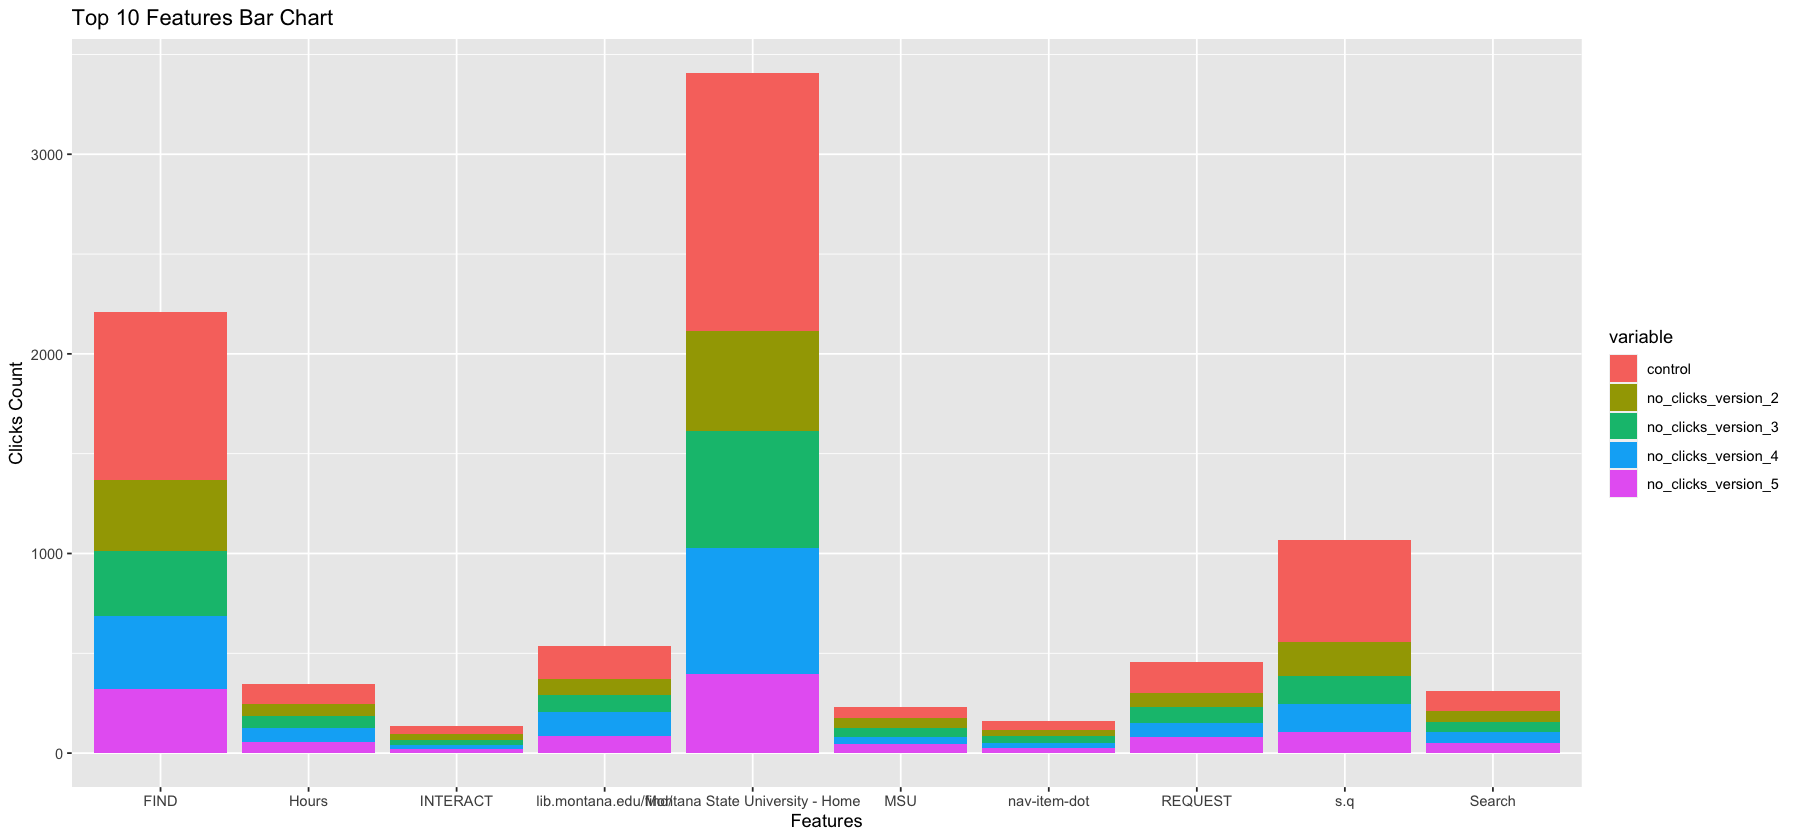

In [37]:
# Bar graph of top 10 features in each version
p <- ggplot(top_10, aes(one_Name, value))
p+geom_bar(stat='identity', aes(fill = variable))+
      labs(
    y = 'Clicks Count',
    x = "Features",
    title = "Top 10 Features Bar Chart"
  ) 